In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("long_df.csv")

In [3]:
df = df.fillna(0)
df.columns
df["sez"] = np.where(df["ent"] > 0,1,0)


In [4]:
df["egdp"].isin([0]).any()

False

In [5]:
df["pop"].isin([0]).any()

False

In [6]:
print(df[['egdp', 'pop']].min())

egdp     0.270584
pop     26.553768
dtype: float64


In [7]:
offset = 1000000 
df["egdppc"] = (df["egdp"]/df["pop"]) + offset
mask = df['egdppc'] == 0 
df = df[~mask]
df["lnegdppc"] = np.log(df["egdppc"])

In [8]:
mask2 = df["ntl_"] == 0
df = df[~mask2] 
df["ntlpc"] = (df["ntl_"]/df["pop"]) + offset
df["lnntlpc"] = np.log(df["ntlpc"])

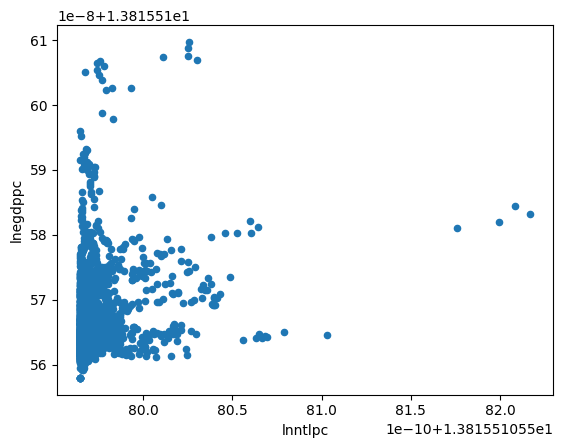

In [9]:
df.plot(x="lnntlpc", y="lnegdppc", kind="scatter");

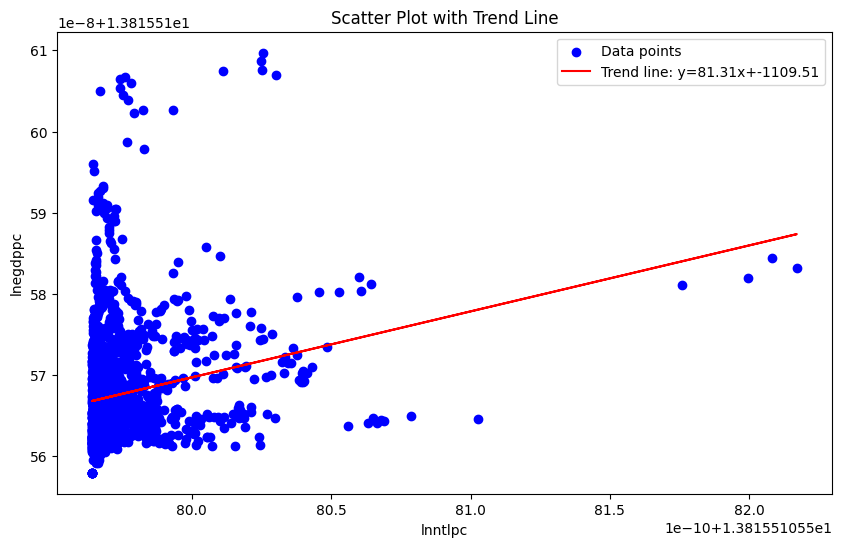

In [11]:
slope, intercept = np.polyfit(df['lnntlpc'], df['lnegdppc'], 1)
trend_line = slope * df['lnntlpc'] + intercept

# Step 2: Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['lnntlpc'], df['lnegdppc'], color='blue', label='Data points')

# Step 3: Add the regression line
plt.plot(df['lnntlpc'], trend_line, color='red', label=f'Trend line: y={slope:.2f}x+{intercept:.2f}')

# Enhance plot
plt.title('Scatter Plot with Trend Line')
plt.xlabel('lnntlpc')
plt.ylabel('lnegdppc')
plt.legend()

plt.show()

In [12]:
df['lnntlpc'].corr(df['lnegdppc'])

0.22208121447832124

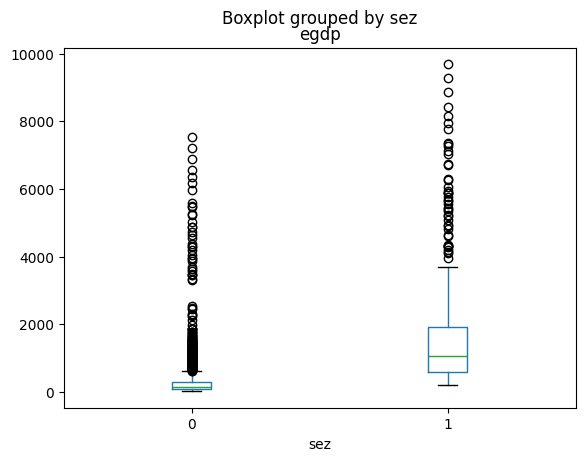

In [13]:
df['new_var'] = np.where(df['ent'] > 1, 1, 0)

boxplot = df.boxplot(by='sez', column=['egdp'], grid=False)

In [ ]:
df.boxplot(by="sez", column="lnegdppc")